In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

data_path = "/content/drive/MyDrive/Dataset_ML_Task/UCI HAR Dataset"
print(os.listdir(data_path))


['activity_labels.txt', '.DS_Store', 'features_info.txt', 'README.txt', 'features.txt', 'train', 'test']


In [ ]:
import numpy as np
import pandas as pd

def load_signals(file_paths):
    """
    Load multiple signal files and stack them along the last dimension.
    Each file has shape (n_samples, 128).
    """
    signals = [pd.read_csv(fp, delim_whitespace=True, header=None).values for fp in file_paths]
    # shape: (n_samples, 128, n_channels)
    return np.stack(signals, axis=-1)

# File paths for train/test
train_signals = [
    os.path.join(data_path, "train/Inertial Signals/body_acc_x_train.txt"),
    os.path.join(data_path, "train/Inertial Signals/body_acc_y_train.txt"),
    os.path.join(data_path, "train/Inertial Signals/body_acc_z_train.txt"),
    os.path.join(data_path, "train/Inertial Signals/body_gyro_x_train.txt"),
    os.path.join(data_path, "train/Inertial Signals/body_gyro_y_train.txt"),
    os.path.join(data_path, "train/Inertial Signals/body_gyro_z_train.txt"),
    os.path.join(data_path, "train/Inertial Signals/total_acc_x_train.txt"),
    os.path.join(data_path, "train/Inertial Signals/total_acc_y_train.txt"),
    os.path.join(data_path, "train/Inertial Signals/total_acc_z_train.txt")
]

test_signals = [
    os.path.join(data_path, "test/Inertial Signals/body_acc_x_test.txt"),
    os.path.join(data_path, "test/Inertial Signals/body_acc_y_test.txt"),
    os.path.join(data_path, "test/Inertial Signals/body_acc_z_test.txt"),
    os.path.join(data_path, "test/Inertial Signals/body_gyro_x_test.txt"),
    os.path.join(data_path, "test/Inertial Signals/body_gyro_y_test.txt"),
    os.path.join(data_path, "test/Inertial Signals/body_gyro_z_test.txt"),
    os.path.join(data_path, "test/Inertial Signals/total_acc_x_test.txt"),
    os.path.join(data_path, "test/Inertial Signals/total_acc_y_test.txt"),
    os.path.join(data_path, "test/Inertial Signals/total_acc_z_test.txt")
]

# Load signals
X_train = load_signals(train_signals)
X_test = load_signals(test_signals)

print("Train shape (samples, timesteps, channels):", X_train.shape)
print("Test shape (samples, timesteps, channels):", X_test.shape)


/tmp/ipython-input-426422734.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  signals = [pd.read_csv(fp, delim_whitespace=True, header=None).values for fp in file_paths]
/tmp/ipython-input-426422734.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  signals = [pd.read_csv(fp, delim_whitespace=True, header=None).values for fp in file_paths]
/tmp/ipython-input-426422734.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  signals = [pd.read_csv(fp, delim_whitespace=True, header=None).values for fp in file_paths]
/tmp/ipython-input-426422734.py:9: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  signals 

Train shape (samples, timesteps, channels): (7352, 128, 9)
Test shape (samples, timesteps, channels): (2947, 128, 9)


In [ ]:
# Load labels (1–6 → shift to 0–5)
y_train = pd.read_csv(os.path.join(data_path, "train/y_train.txt"), delim_whitespace=True, header=None)[0].values - 1
y_test  = pd.read_csv(os.path.join(data_path, "test/y_test.txt"),  delim_whitespace=True, header=None)[0].values - 1

print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


/tmp/ipython-input-3701873569.py:2: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_train = pd.read_csv(os.path.join(data_path, "train/y_train.txt"), delim_whitespace=True, header=None)[0].values - 1
/tmp/ipython-input-3701873569.py:3: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  y_test  = pd.read_csv(os.path.join(data_path, "test/y_test.txt"),  delim_whitespace=True, header=None)[0].values - 1


y_train shape: (7352,)
y_test shape: (2947,)


In [ ]:
from sklearn.preprocessing import StandardScaler

# Flatten (n_samples, 128*9)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

print("Flattened Train shape:", X_train.shape)  # should be (7352, 1152)
print("Flattened Test shape:", X_test.shape)    # should be (2947, 1152)


Flattened Train shape: (7352, 1152)
Flattened Test shape: (2947, 1152)


In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset  = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader  = DataLoader(test_dataset, batch_size=64, shuffle=False)


##MLP


In [ ]:
import torch.nn as nn
import torch.optim as optim

class MLP(nn.Module):
    def __init__(self, input_dim=1152, hidden1=256, hidden2=128, num_classes=6, p_dropout=0.5):
        super(MLP, self).__init__()
        self.block1 = nn.Sequential(
            nn.Linear(input_dim, hidden1),
            nn.BatchNorm1d(hidden1),
            nn.ReLU(),
            nn.Dropout(p_dropout)
        )
        self.block2 = nn.Sequential(
            nn.Linear(hidden1, hidden2),
            nn.BatchNorm1d(hidden2),
            nn.ReLU(),
            nn.Dropout(p_dropout)
        )
        self.classifier = nn.Linear(hidden2, num_classes)

    def forward(self, x):
        x = self.block1(x)
        x = self.block2(x)
        return self.classifier(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = MLP().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)

print(model)


MLP(
  (block1): Sequential(
    (0): Linear(in_features=1152, out_features=256, bias=True)
    (1): BatchNorm1d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
  )
  (block2): Sequential(
    (0): Linear(in_features=256, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.5, inplace=False)
  )
  (classifier): Linear(in_features=128, out_features=6, bias=True)
)


In [ ]:
epochs = 20

for epoch in range(epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    acc = correct / total
    print(f"Epoch [{epoch+1}/{epochs}], Loss: {total_loss/len(train_loader):.4f}, Acc: {acc:.4f}")


Epoch [1/20], Loss: 0.7420, Acc: 0.7462
Epoch [2/20], Loss: 0.3705, Acc: 0.8755
Epoch [3/20], Loss: 0.2815, Acc: 0.9002
Epoch [4/20], Loss: 0.2385, Acc: 0.9123
Epoch [5/20], Loss: 0.2067, Acc: 0.9211
Epoch [6/20], Loss: 0.2071, Acc: 0.9203
Epoch [7/20], Loss: 0.1945, Acc: 0.9280
Epoch [8/20], Loss: 0.1916, Acc: 0.9263
Epoch [9/20], Loss: 0.1690, Acc: 0.9363
Epoch [10/20], Loss: 0.1632, Acc: 0.9361
Epoch [11/20], Loss: 0.1608, Acc: 0.9332
Epoch [12/20], Loss: 0.1593, Acc: 0.9354
Epoch [13/20], Loss: 0.1574, Acc: 0.9354
Epoch [14/20], Loss: 0.1580, Acc: 0.9374
Epoch [15/20], Loss: 0.1573, Acc: 0.9348
Epoch [16/20], Loss: 0.1558, Acc: 0.9363
Epoch [17/20], Loss: 0.1476, Acc: 0.9427
Epoch [18/20], Loss: 0.1479, Acc: 0.9395
Epoch [19/20], Loss: 0.1477, Acc: 0.9410
Epoch [20/20], Loss: 0.1477, Acc: 0.9399


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = outputs.max(1)
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

# Compute metrics
acc1 = accuracy_score(y_true, y_pred)
prec1 = precision_score(y_true, y_pred, average='weighted')
rec1 = recall_score(y_true, y_pred, average='weighted')
f11 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy : {acc1:.4f}")
print(f"Precision: {prec1:.4f}")
print(f"Recall   : {rec1:.4f}")
print(f"F1-score : {f11:.4f}")


Accuracy : 0.9138
Precision: 0.9153
Recall   : 0.9138
F1-score : 0.9139


##CNN

In [ ]:
# Reshape: (n_samples, 128, 9) → (n_samples, 9, 128)
X_train_cnn = X_train.reshape(-1, 9, 128)
X_test_cnn = X_test.reshape(-1, 9, 128)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train_cnn, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_cnn, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# Dataloaders
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=64, shuffle=False)

print("CNN input shape:", X_train_tensor.shape)  # (7352, 9, 128)


CNN input shape: torch.Size([7352, 9, 128])


In [ ]:
class CNN(nn.Module):
    def __init__(self, num_classes=6):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv1d(in_channels=9, out_channels=64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(64)
        self.pool1 = nn.MaxPool1d(2)

        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(128)
        self.pool2 = nn.MaxPool1d(2)

        self.conv3 = nn.Conv1d(128, 256, kernel_size=3, padding=1)
        self.bn3 = nn.BatchNorm1d(256)
        self.pool3 = nn.AdaptiveMaxPool1d(1)  # Global pooling

        self.fc = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        x = self.pool3(torch.relu(self.bn3(self.conv3(x))))
        x = x.view(x.size(0), -1)  # flatten
        return self.fc(x)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)


In [ ]:
epochs = 20
for epoch in range(epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    acc = correct / total
    print(f"Epoch [{epoch+1}/{epochs}] Loss: {total_loss/len(train_loader):.4f}, Train Acc: {acc:.4f}")


Epoch [1/20] Loss: 0.4241, Train Acc: 0.8354
Epoch [2/20] Loss: 0.1628, Train Acc: 0.9434
Epoch [3/20] Loss: 0.1208, Train Acc: 0.9540
Epoch [4/20] Loss: 0.1031, Train Acc: 0.9585
Epoch [5/20] Loss: 0.0953, Train Acc: 0.9618
Epoch [6/20] Loss: 0.0853, Train Acc: 0.9656
Epoch [7/20] Loss: 0.0805, Train Acc: 0.9664
Epoch [8/20] Loss: 0.0745, Train Acc: 0.9683
Epoch [9/20] Loss: 0.0691, Train Acc: 0.9709
Epoch [10/20] Loss: 0.0695, Train Acc: 0.9695
Epoch [11/20] Loss: 0.0677, Train Acc: 0.9718
Epoch [12/20] Loss: 0.0647, Train Acc: 0.9723
Epoch [13/20] Loss: 0.0557, Train Acc: 0.9759
Epoch [14/20] Loss: 0.0585, Train Acc: 0.9744
Epoch [15/20] Loss: 0.0512, Train Acc: 0.9778
Epoch [16/20] Loss: 0.0548, Train Acc: 0.9762
Epoch [17/20] Loss: 0.0545, Train Acc: 0.9774
Epoch [18/20] Loss: 0.0559, Train Acc: 0.9752
Epoch [19/20] Loss: 0.0510, Train Acc: 0.9788
Epoch [20/20] Loss: 0.0568, Train Acc: 0.9770


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = outputs.max(1)
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

acc2 = accuracy_score(y_true, y_pred)
prec2 = precision_score(y_true, y_pred, average='weighted')
rec2 = recall_score(y_true, y_pred, average='weighted')
f12 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy : {acc2:.4f}")
print(f"Precision: {prec2:.4f}")
print(f"Recall   : {rec2:.4f}")
print(f"F1-score : {f12:.4f}")


Accuracy : 0.8765
Precision: 0.8860
Recall   : 0.8765
F1-score : 0.8735


##LSTM

In [ ]:
# Reshape: (n_samples, 128, 9)
X_train_lstm = X_train.reshape(-1, 128, 9)
X_test_lstm = X_test.reshape(-1, 128, 9)

# Convert to torch tensors
X_train_tensor = torch.tensor(X_train_lstm, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_lstm, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# DataLoaders
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=64, shuffle=False)

print("LSTM input shape:", X_train_tensor.shape)  # (7352, 128, 9)


LSTM input shape: torch.Size([7352, 128, 9])


In [ ]:
class LSTMNet(nn.Module):
    def __init__(self, input_size=9, hidden_size=128, num_layers=2, num_classes=6, dropout=0.5):
        super(LSTMNet, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size,
                            hidden_size=hidden_size,
                            num_layers=num_layers,
                            batch_first=True,
                            dropout=dropout)
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # x: (batch, seq_len, input_size)
        out, (hn, cn) = self.lstm(x)
        # Take the last hidden state
        out = hn[-1]   # shape: (batch, hidden_size)
        out = self.fc(out)
        return out

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = LSTMNet().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)


In [ ]:
epochs = 20
for epoch in range(epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    acc = correct / total
    print(f"Epoch [{epoch+1}/{epochs}] Loss: {total_loss/len(train_loader):.4f}, Train Acc: {acc:.4f}")


Epoch [1/20] Loss: 0.9524, Train Acc: 0.6098
Epoch [2/20] Loss: 0.3818, Train Acc: 0.8570
Epoch [3/20] Loss: 0.2350, Train Acc: 0.9131
Epoch [4/20] Loss: 0.1666, Train Acc: 0.9382
Epoch [5/20] Loss: 0.1485, Train Acc: 0.9446
Epoch [6/20] Loss: 0.1465, Train Acc: 0.9414
Epoch [7/20] Loss: 0.1674, Train Acc: 0.9305
Epoch [8/20] Loss: 0.1280, Train Acc: 0.9474
Epoch [9/20] Loss: 0.1320, Train Acc: 0.9517
Epoch [10/20] Loss: 0.1196, Train Acc: 0.9539
Epoch [11/20] Loss: 0.1160, Train Acc: 0.9569
Epoch [12/20] Loss: 0.1200, Train Acc: 0.9518
Epoch [13/20] Loss: 0.1565, Train Acc: 0.9433
Epoch [14/20] Loss: 0.1551, Train Acc: 0.9380
Epoch [15/20] Loss: 0.1147, Train Acc: 0.9557
Epoch [16/20] Loss: 0.1315, Train Acc: 0.9514
Epoch [17/20] Loss: 0.1226, Train Acc: 0.9498
Epoch [18/20] Loss: 0.1237, Train Acc: 0.9476
Epoch [19/20] Loss: 0.1099, Train Acc: 0.9573
Epoch [20/20] Loss: 0.1065, Train Acc: 0.9562


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = outputs.max(1)
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

acc3 = accuracy_score(y_true, y_pred)
prec3 = precision_score(y_true, y_pred, average='weighted')
rec3 = recall_score(y_true, y_pred, average='weighted')
f13 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy : {acc3:.4f}")
print(f"Precision: {prec3:.4f}")
print(f"Recall   : {rec3:.4f}")
print(f"F1-score : {f13:.4f}")


Accuracy : 0.9074
Precision: 0.9076
Recall   : 0.9074
F1-score : 0.9071


##CNN-LSTM Hybrid

In [ ]:
# Reshape back to (samples, 128, 9) for CNN-LSTM
X_train_cnnlstm = X_train.reshape(-1, 128, 9)
X_test_cnnlstm = X_test.reshape(-1, 128, 9)

# Torch tensors
X_train_tensor = torch.tensor(X_train_cnnlstm, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.long)

X_test_tensor = torch.tensor(X_test_cnnlstm, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test, dtype=torch.long)

# DataLoaders
train_loader = DataLoader(TensorDataset(X_train_tensor, y_train_tensor), batch_size=64, shuffle=True)
test_loader  = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=64, shuffle=False)

print("CNN-LSTM input shape:", X_train_tensor.shape)  # (7352, 128, 9)


CNN-LSTM input shape: torch.Size([7352, 128, 9])


In [ ]:
class CNN_LSTM(nn.Module):
    def __init__(self, num_classes=6, hidden_size=128, num_layers=1, dropout=0.5):
        super(CNN_LSTM, self).__init__()
        # CNN part
        self.conv1 = nn.Conv1d(in_channels=9, out_channels=64, kernel_size=3, padding=1)
        self.bn1 = nn.BatchNorm1d(64)
        self.pool1 = nn.MaxPool1d(2)  # (128 → 64 timesteps)

        self.conv2 = nn.Conv1d(64, 128, kernel_size=3, padding=1)
        self.bn2 = nn.BatchNorm1d(128)
        self.pool2 = nn.MaxPool1d(2)  # (64 → 32 timesteps)

        # LSTM part
        self.lstm = nn.LSTM(input_size=128, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True, dropout=dropout)

        # FC classifier
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        # x: (batch, seq_len=128, features=9)
        # CNN expects (batch, channels, seq_len)
        x = x.permute(0, 2, 1)

        x = self.pool1(torch.relu(self.bn1(self.conv1(x))))
        x = self.pool2(torch.relu(self.bn2(self.conv2(x))))
        # shape now: (batch, channels=128, seq_len=32)

        # Back to LSTM format: (batch, seq_len, features)
        x = x.permute(0, 2, 1)  # (batch, 32, 128)

        # LSTM
        out, (hn, cn) = self.lstm(x)
        out = hn[-1]  # last hidden state

        return self.fc(out)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = CNN_LSTM().to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=1e-3, weight_decay=1e-5)


/usr/local/lib/python3.12/dist-packages/torch/nn/modules/rnn.py:123: UserWarning: dropout option adds dropout after all but last recurrent layer, so non-zero dropout expects num_layers greater than 1, but got dropout=0.5 and num_layers=1
  warnings.warn(


In [ ]:
epochs = 20
for epoch in range(epochs):
    model.train()
    total_loss, correct, total = 0, 0, 0

    for X_batch, y_batch in train_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)

        optimizer.zero_grad()
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
        _, predicted = outputs.max(1)
        correct += (predicted == y_batch).sum().item()
        total += y_batch.size(0)

    acc = correct / total
    print(f"Epoch [{epoch+1}/{epochs}] Loss: {total_loss/len(train_loader):.4f}, Train Acc: {acc:.4f}")


Epoch [1/20] Loss: 0.4084, Train Acc: 0.8547
Epoch [2/20] Loss: 0.1439, Train Acc: 0.9421
Epoch [3/20] Loss: 0.1308, Train Acc: 0.9489
Epoch [4/20] Loss: 0.1278, Train Acc: 0.9491
Epoch [5/20] Loss: 0.1280, Train Acc: 0.9467
Epoch [6/20] Loss: 0.1168, Train Acc: 0.9478
Epoch [7/20] Loss: 0.1110, Train Acc: 0.9514
Epoch [8/20] Loss: 0.1148, Train Acc: 0.9520
Epoch [9/20] Loss: 0.1137, Train Acc: 0.9524
Epoch [10/20] Loss: 0.1169, Train Acc: 0.9484
Epoch [11/20] Loss: 0.1329, Train Acc: 0.9450
Epoch [12/20] Loss: 0.1135, Train Acc: 0.9516
Epoch [13/20] Loss: 0.1124, Train Acc: 0.9517
Epoch [14/20] Loss: 0.1078, Train Acc: 0.9521
Epoch [15/20] Loss: 0.1183, Train Acc: 0.9489
Epoch [16/20] Loss: 0.1097, Train Acc: 0.9535
Epoch [17/20] Loss: 0.1016, Train Acc: 0.9558
Epoch [18/20] Loss: 0.1082, Train Acc: 0.9513
Epoch [19/20] Loss: 0.1069, Train Acc: 0.9528
Epoch [20/20] Loss: 0.1084, Train Acc: 0.9547


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

model.eval()
y_true, y_pred = [], []

with torch.no_grad():
    for X_batch, y_batch in test_loader:
        X_batch, y_batch = X_batch.to(device), y_batch.to(device)
        outputs = model(X_batch)
        _, predicted = outputs.max(1)
        y_true.extend(y_batch.cpu().numpy())
        y_pred.extend(predicted.cpu().numpy())

acc4 = accuracy_score(y_true, y_pred)
prec4 = precision_score(y_true, y_pred, average='weighted')
rec4 = recall_score(y_true, y_pred, average='weighted')
f14 = f1_score(y_true, y_pred, average='weighted')

print(f"Accuracy : {acc4:.4f}")
print(f"Precision: {prec4:.4f}")
print(f"Recall   : {rec4:.4f}")
print(f"F1-score : {f14:.4f}")


Accuracy : 0.9382
Precision: 0.9383
Recall   : 0.9382
F1-score : 0.9381


In [ ]:

from tabulate import tabulate

# Store results
table = [
    ["MLP", acc1, prec1, rec1, f11],
    ["CNN", acc2, prec2, rec2, f12],
    ["LSTM", acc3, prec3, rec3, f13],
    ["CNN-LSTM", acc4, prec4, rec4, f14]
]

# Define headers
headers = ["Model", "Accuracy", "Precision", "Recall", "F1-score"]

# Print table
print(tabulate(table, headers=headers, tablefmt="fancy_grid", floatfmt=".4f"))


╒══════════╤════════════╤═════════════╤══════════╤════════════╕
│ Model    │   Accuracy │   Precision │   Recall │   F1-score │
╞══════════╪════════════╪═════════════╪══════════╪════════════╡
│ MLP      │     0.9138 │      0.9153 │   0.9138 │     0.9139 │
├──────────┼────────────┼─────────────┼──────────┼────────────┤
│ CNN      │     0.8765 │      0.8860 │   0.8765 │     0.8735 │
├──────────┼────────────┼─────────────┼──────────┼────────────┤
│ LSTM     │     0.9074 │      0.9076 │   0.9074 │     0.9071 │
├──────────┼────────────┼─────────────┼──────────┼────────────┤
│ CNN-LSTM │     0.9382 │      0.9383 │   0.9382 │     0.9381 │
╘══════════╧════════════╧═════════════╧══════════╧════════════╛


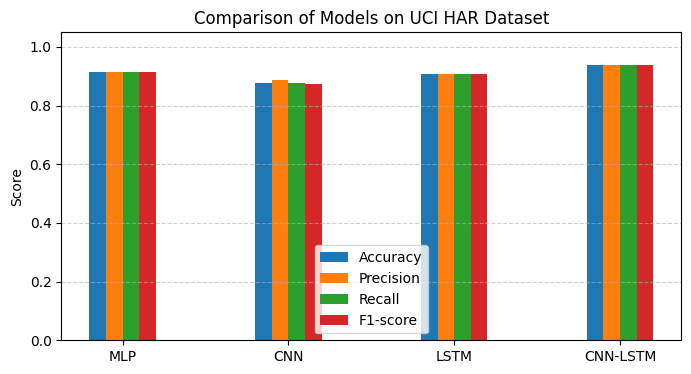

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Metrics for each model
models = ["MLP", "CNN", "LSTM", "CNN-LSTM"]
accuracy = [acc1, acc2, acc3, acc4]
precision = [prec1, prec2, prec3, prec4]
recall = [rec1, rec2, rec3, rec4]
f1 = [f11, f12, f13, f14]

# Bar positions
x = np.arange(len(models))
width = 0.1  # slimmer bars

# Create plot with tighter spacing
plt.figure(figsize=(8,4))
plt.bar(x - 0.15, accuracy, width, label='Accuracy')
plt.bar(x - 0.05, precision, width, label='Precision')
plt.bar(x + 0.05, recall, width, label='Recall')
plt.bar(x + 0.15, f1, width, label='F1-score')

# Formatting
plt.xticks(x, models)
plt.ylabel("Score")
plt.ylim(0, 1.05)
plt.title("Comparison of Models on UCI HAR Dataset")
plt.legend()
plt.grid(axis='y', linestyle="--", alpha=0.6)

plt.show()
